In [1]:
# data manipulation
import pandas as pd
import numpy as np
from operator import itemgetter 

# visualiation
import seaborn as sb
import matplotlib.pyplot as plt
#%matplotlib inline

# model training
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# classifiers
from sklearn.naive_bayes import GaussianNB # naive bayes
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.svm import SVC # SVM
from sklearn.linear_model import LogisticRegression # logistic regression
from sklearn.tree import DecisionTreeClassifier # decision Tree
from sklearn.ensemble import BaggingClassifier 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

# metrics
from sklearn.metrics import f1_score # F1-score
from sklearn.metrics import confusion_matrix # Confusion matrix

# ignore warnings
import warnings
warnings.filterwarnings('ignore')
print("import done ! ")

import done ! 


In [37]:
pima = pd.read_csv("data_finale.csv")
pima = pima[["Total_time(s)", "Average_bitrate(Mbps)", "label"]]
pima

,Total_time(s),Average_bitrate(Mbps),label
0,0.996035,0.393560,Mouse
1,19.990688,0.158074,Mouse
2,39.996039,0.079408,Elephant
3,19.991628,0.193281,Mouse
4,29.972882,0.158810,Mouse
...,...,...,...
10930,3.986399,0.387317,Mouse
10931,0.997604,5.429008,Elephant
10932,29.999763,11.764093,Elephant
10933,3.998841,5.517599,Elephant


In [38]:
pima.dtypes

Total_time(s)            float64
Average_bitrate(Mbps)    float64
label                     object
dtype: object

In [39]:
pima.isnull().sum()

Total_time(s)            0
Average_bitrate(Mbps)    0
label                    0
dtype: int64

[5120, 5815]


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/dist-packages/matplotlib/pyplot.py'>

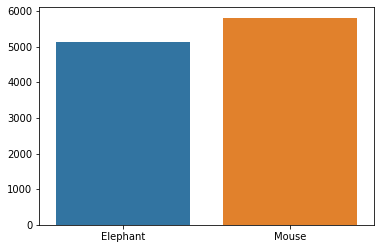

In [40]:
counts = [(pima['label'] == "Elephant").sum(), (pima['label'] == "Mouse").sum()]
print(counts)

sb.barplot(x=['Elephant','Mouse'], y=counts)

plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/dist-packages/matplotlib/pyplot.py'>

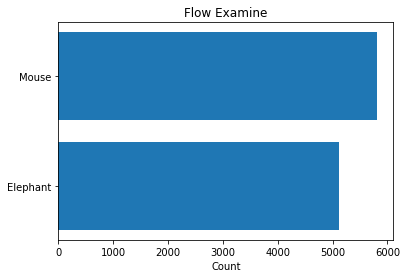

In [41]:
objects = ('Elephant', 'Mouse')
y_pos = np.arange(len(objects))
counts = [(pima['label'] == "Elephant").sum(), (pima['label'] == "Mouse").sum()]

plt.barh(y_pos, counts, align='center')
plt.yticks(y_pos, objects)
plt.xlabel('Count')
plt.title('Flow Examine')

plt

In [49]:
pima1 = pima[:]

pima1["Total_time(s)"] = pd.cut(pima1['Total_time(s)'].astype(float), 2 ,labels=[0,1])
pima1["Average_bitrate(Mbps)"]= pd.cut(pima1['Average_bitrate(Mbps)'].astype(float), 2 , labels=[0,1])
pima.head()


,Total_time(s),Average_bitrate(Mbps),label
0,0.996035,0.393560,Mouse
1,19.990688,0.158074,Mouse
2,39.996039,0.079408,Elephant
3,19.991628,0.193281,Mouse
4,29.972882,0.158810,Mouse


In [50]:
pima1 = pd.get_dummies(pima1)
pima1.head()

,Total_time(s)_0,Total_time(s)_1,Average_bitrate(Mbps)_0,Average_bitrate(Mbps)_1,label_Elephant,label_Mouse
0,1,0,1,0,0,1
1,1,0,1,0,0,1
2,1,0,1,0,1,0
3,1,0,1,0,0,1
4,1,0,1,0,0,1


In [51]:
pima2 = pima[["Total_time(s)", "Average_bitrate(Mbps)"]]
cols = pima2.columns.tolist()[0:8]
for col in cols:
    pima2[col] = (pima2[col] - pima2[col].mean()) / pima2[col].std()
pima2.head()

,Total_time(s),Average_bitrate(Mbps)
0,-0.027881,-0.762052
1,-0.016383,-0.829836
2,-0.004273,-0.852479
3,-0.016382,-0.819701
4,-0.010340,-0.829624


In [52]:
x1 = pima.drop(columns='label')
y1 = pima['label']
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size = 0.25, random_state=0)

x2 = pima.drop(columns='label')
y2 = pima['label']
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size = 0.25, random_state=0)

print(x1.shape, y1.shape)
print(x2.shape, y2.shape)

(10935, 2) (10935,)
(10935, 2) (10935,)


In [53]:
x1.shape

(10935, 2)

In [54]:
x_train1
y_train1

356      Elephant
3010     Elephant
3149        Mouse
6402     Elephant
6459        Mouse
           ...   
4859     Elephant
3264        Mouse
9845        Mouse
10799    Elephant
2732     Elephant
Name: label, Length: 8201, dtype: object

In [57]:
model_names = [ 'KNN','DT']
pima1_acc = []
pima2_acc = []
pima1_f1 = []
pima2_f1 = []
# --- Your code here ---

# K-Nearest neighbors
Kneigh_1 = KNeighborsClassifier()
Kneigh_1.fit(x_train1, y_train1)
pima1_acc.append(Kneigh_1.score(x_test1,y_test1))
pima1_f1.append(f1_score(y_test1, Kneigh_1.predict(x_test1), average='weighted') )

Kneigh_2 = KNeighborsClassifier()
Kneigh_2.fit(x_train2, y_train2)
pima2_acc.append(Kneigh_2.score(x_test2,y_test2))
pima2_f1.append(f1_score(y_test2, Kneigh_2.predict(x_test2), average='weighted') )

# Decision tree
Tree_1 = DecisionTreeClassifier()
Tree_1.fit(x_train1, y_train1);
pima1_acc.append(Tree_1.score(x_test1,y_test1))
pima1_f1.append(f1_score(y_test1, Tree_1.predict(x_test1), average='weighted') )

Tree_2 = DecisionTreeClassifier()
Tree_2.fit(x_train2, y_train2);
pima2_acc.append(Tree_2.score(x_test2,y_test2))
pima2_f1.append(f1_score(y_test2, Tree_2.predict(x_test2), average='weighted') )

# --- End of your code ---

accuracy_record = pd.DataFrame({'Model': model_names, 'pima1_acc': pima1_acc, 'pima2_acc': pima2_acc})
accuracy_record['acc_mean'] = accuracy_record.mean(axis=1).round(2)
accuracy_record.set_index('Model', inplace=True)
accuracy_record.loc['avg'] = accuracy_record.mean()

F1_record = pd.DataFrame({'Model': model_names, 'pima1_f1': pima1_f1, 'pima2_f1': pima2_f1})
F1_record['F1_mean'] = F1_record.mean(axis=1).round(2)
F1_record.set_index('Model', inplace=True)
F1_record.loc['avg'] = F1_record.mean()

print(accuracy_record)
print('\n')
print(F1_record)

       pima1_acc  pima2_acc  acc_mean
Model                                
KNN     0.995245   0.995245       1.0
DT      0.999634   0.999634       1.0
avg     0.997440   0.997440       1.0


       pima1_f1  pima2_f1  F1_mean
Model                             
KNN    0.995243  0.995243      1.0
DT     0.999634  0.999634      1.0
avg    0.997439  0.997439      1.0


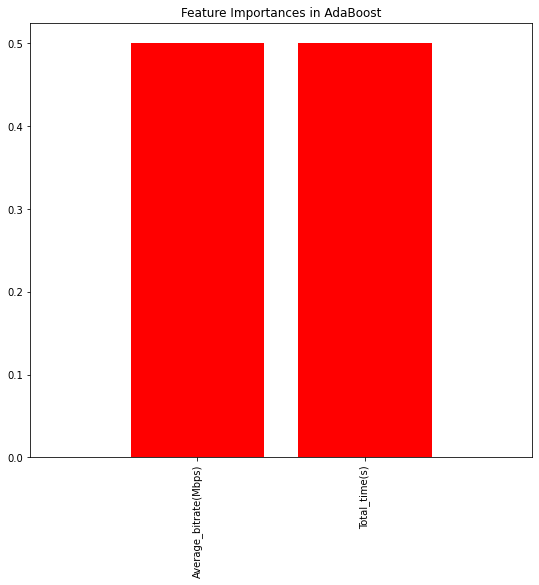

In [58]:
x_train = x_train2
y_train = y_train2

ada = AdaBoostClassifier(random_state=0)
ada.fit(x_train, y_train)
relevants = ada.feature_importances_
indices = np.argsort(relevants)[::-1]

# Plot feature importances
plt.figure(1, figsize=(9, 8))
plt.title('Feature Importances in AdaBoost')
plt.bar(range(x_train.shape[1]), relevants[indices], color='r', align='center')
plt.xticks(range(x_train.shape[1]), x_train.columns[indices], rotation=90)
plt.xlim([-1, x_train.shape[1]])
plt.show()

In [59]:
relevants

array([0.5, 0.5])

In [60]:
model_names = ['Gaussian NB', 'KNN', 'SVM', 'LR', 'DT']
pima1_acc = []
pima2_acc = []
pima1_f1 = []
pima2_f1 = []

# --- Your code here ---
# Gaussian naive bayes
Gaussianed_1 = GaussianNB()
Gaussianed_1.fit(x_train1, y_train1);
pima1_acc.append(Gaussianed_1.score(x_test1,y_test1))
pima1_f1.append(f1_score(y_test1, Gaussianed_1.predict(x_test1), average='weighted') )

Gaussianed_2 = GaussianNB()
Gaussianed_2.fit(x_train2, y_train2);
pima2_acc.append(Gaussianed_2.score(x_test2,y_test2))
pima2_f1.append(f1_score(y_test2, Gaussianed_2.predict(x_test2), average='weighted') )

# K-Nearest neighbors
Kneigh_1 = KNeighborsClassifier()
Kneigh_1.fit(x_train1, y_train1)
pima1_acc.append(Kneigh_1.score(x_test1,y_test1))
pima1_f1.append(f1_score(y_test1, Kneigh_1.predict(x_test1), average='weighted') )

Kneigh_2 = KNeighborsClassifier()
Kneigh_2.fit(x_train2, y_train2)
pima2_acc.append(Kneigh_2.score(x_test2,y_test2))
pima2_f1.append(f1_score(y_test2, Kneigh_2.predict(x_test2), average='weighted') )

# Support Vector Machine
SVM_1 = SVC()
SVM_1.fit(x_train1, y_train1)
pima1_acc.append(SVM_1.score(x_test1,y_test1))
pima1_f1.append(f1_score(y_test1, SVM_1.predict(x_test1), average='weighted') )

SVM_2 = SVC()
SVM_2.fit(x_train2, y_train2)
pima2_acc.append(SVM_2.score(x_test2,y_test2))
pima2_f1.append(f1_score(y_test2, SVM_2.predict(x_test2), average='weighted') )

# Logistic regression
Logic_1 = LogisticRegression()
Logic_1.fit(x_train1, y_train1);
pima1_acc.append(Logic_1.score(x_test1,y_test1))
pima1_f1.append(f1_score(y_test1, Logic_1.predict(x_test1), average='weighted') )

Logic_2 = LogisticRegression()
Logic_2.fit(x_train2, y_train2);
pima2_acc.append(Logic_2.score(x_test2,y_test2))
pima2_f1.append(f1_score(y_test2, Logic_2.predict(x_test2), average='weighted') )

# Decision tree
Tree_1 = DecisionTreeClassifier()
Tree_1.fit(x_train1, y_train1);
pima1_acc.append(Tree_1.score(x_test1,y_test1))
pima1_f1.append(f1_score(y_test1, Tree_1.predict(x_test1), average='weighted') )

Tree_2 = DecisionTreeClassifier()
Tree_2.fit(x_train2, y_train2);
pima2_acc.append(Tree_2.score(x_test2,y_test2))
pima2_f1.append(f1_score(y_test2, Tree_2.predict(x_test2), average='weighted') )

# --- End of your code ---

accuracy_record = pd.DataFrame({'Model': model_names, 'pima1_acc': pima1_acc, 'pima2_acc': pima2_acc})
accuracy_record['acc_mean'] = accuracy_record.mean(axis=1).round(2)
accuracy_record.set_index('Model', inplace=True)
accuracy_record.loc['avg'] = accuracy_record.mean()

F1_record = pd.DataFrame({'Model': model_names, 'pima1_f1': pima1_f1, 'pima2_f1': pima2_f1})
F1_record['F1_mean'] = F1_record.mean(axis=1).round(2)
F1_record.set_index('Model', inplace=True)
F1_record.loc['avg'] = F1_record.mean()

print(accuracy_record)
print('\n')
print(F1_record)

             pima1_acc  pima2_acc  acc_mean
Model                                      
Gaussian NB   0.885881   0.885881     0.890
KNN           0.995245   0.995245     1.000
SVM           0.542429   0.542429     0.540
LR            0.955377   0.955377     0.960
DT            0.999634   0.999634     1.000
avg           0.875713   0.875713     0.878


             pima1_f1  pima2_f1  F1_mean
Model                                   
Gaussian NB  0.883183  0.883183    0.880
KNN          0.995243  0.995243    1.000
SVM          0.381514  0.381514    0.380
LR           0.955431  0.955431    0.960
DT           0.999634  0.999634    1.000
avg          0.843001  0.843001    0.844
